In [1]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

# Coerce to labeller function

<b style = 'color:red'>Basically, This function convert an object(a mapping, a function, ...) to a function that behave like **`label_value`**, **`label_both`**, **`label_context`**, ...

This transforms objects to labeller functions. Used internally by labeller().
```R
as_labeller(x, default = label_value, multi_line = TRUE)
```
**Arguments**  
`x`	 
Object to coerce to a labeller function. If a named character vector, it is used as a lookup table before being passed on to default. If a non-labeller function, it is assumed it takes and returns character vectors and is applied to the labels. If a labeller, it is simply applied to the labels.

`default`	
Default labeller to process the labels produced by lookup tables or modified by non-labeller functions.

`multi_line`	
Whether to display the labels of multiple factors on separate lines. This is passed to the labeller function.

# Example

In [12]:
setwd('C:/Users/dell/PycharmProjects/MachineLearning/Pandas/datasets')
getwd()

[1] "C:/Users/dell/PycharmProjects/MachineLearning/Pandas/datasets"

In [13]:
tips <- read.csv('./tips.csv')
head(tips)

X,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4


In [3]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [8]:
mapping <- c(`1` = 'One', 
             `2` = 'Two', 
             `3` = 'Three', 
             `4` = 'Four',
             `5` = 'Five', 
             `6` = 'Six', 
             `7` = 'Seven',
             `8` = 'Eight',
             `0` = 'Zero')

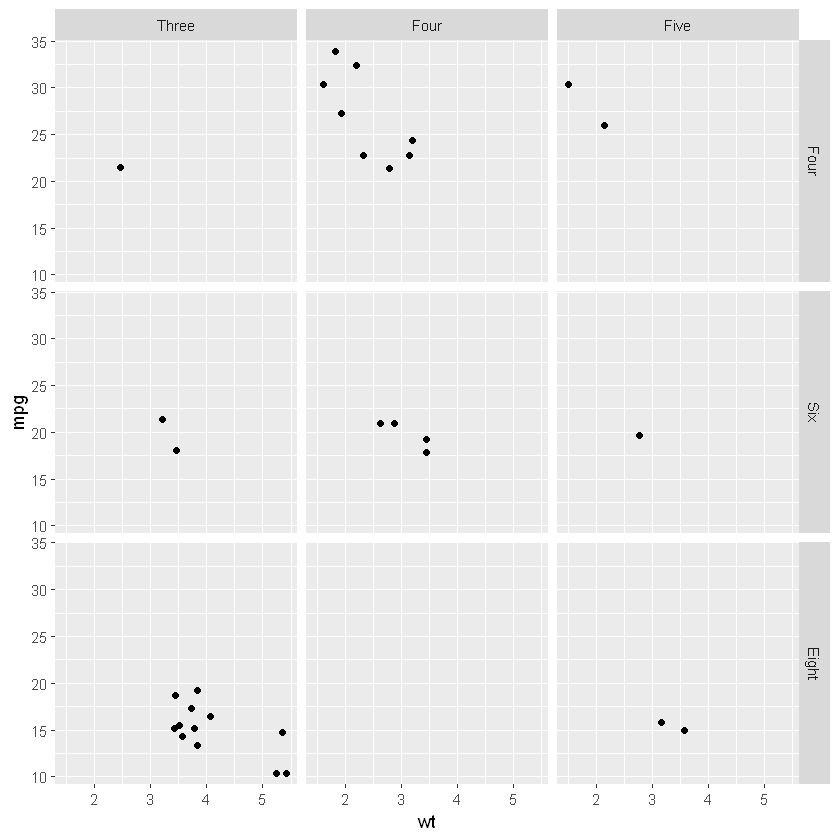

In [11]:
# Rename labels on the fly with a lookup character vector
#to_string now is like function label_value, label_both, ....
to_string <- as_labeller(mapping)

ggplot(mtcars, aes(wt, mpg)) + 
geom_point() +
facet_grid(cyl ~ gear, 
           labeller = to_string)   #apply mapping to every varible of facet
                                   #it works just like label_both, label_value
                                   #when we set labeller = label_both
                                   #facet_grid(sex + smoker ~ day + time, labeller = label_both), it is equivalent to:
                                   #labeller = labeller(sex = label_both, 
                                   #                    smoker = label_both, 
                                   #                    day = label_both, 
                                   #                    time = label_both)

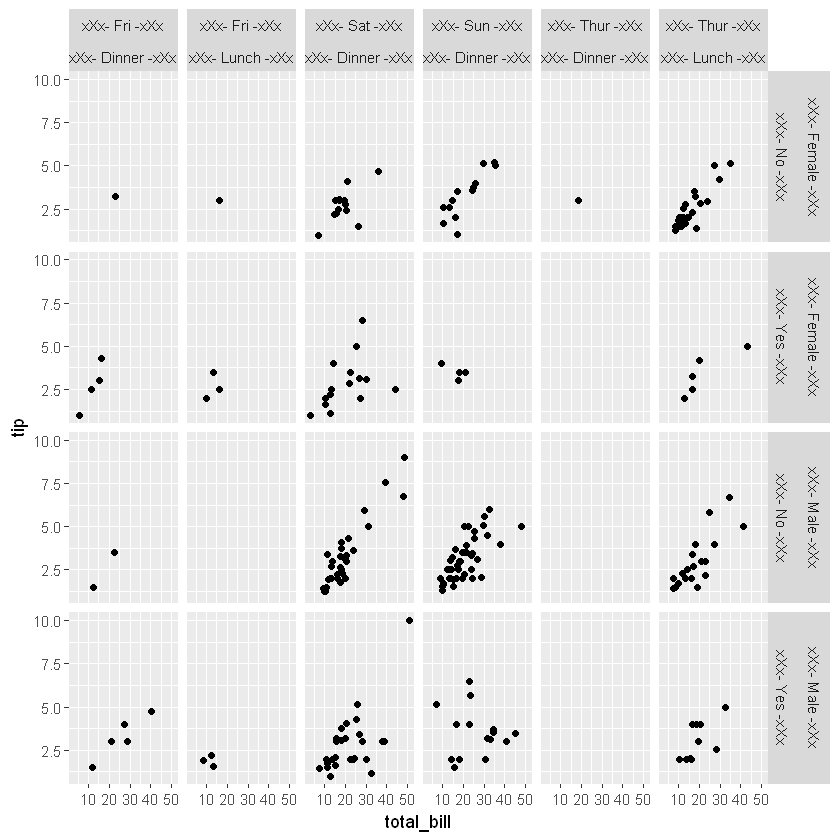

In [14]:
# Quickly transform a function operating on character vectors to labeller function
label_decorate <- as_labeller(function(labels) paste('xXx-', labels, '-xXx'))

ggplot(tips, aes(total_bill, tip)) +
geom_point() + 
facet_grid(sex + smoker ~ day + time, labeller = label_decorate)

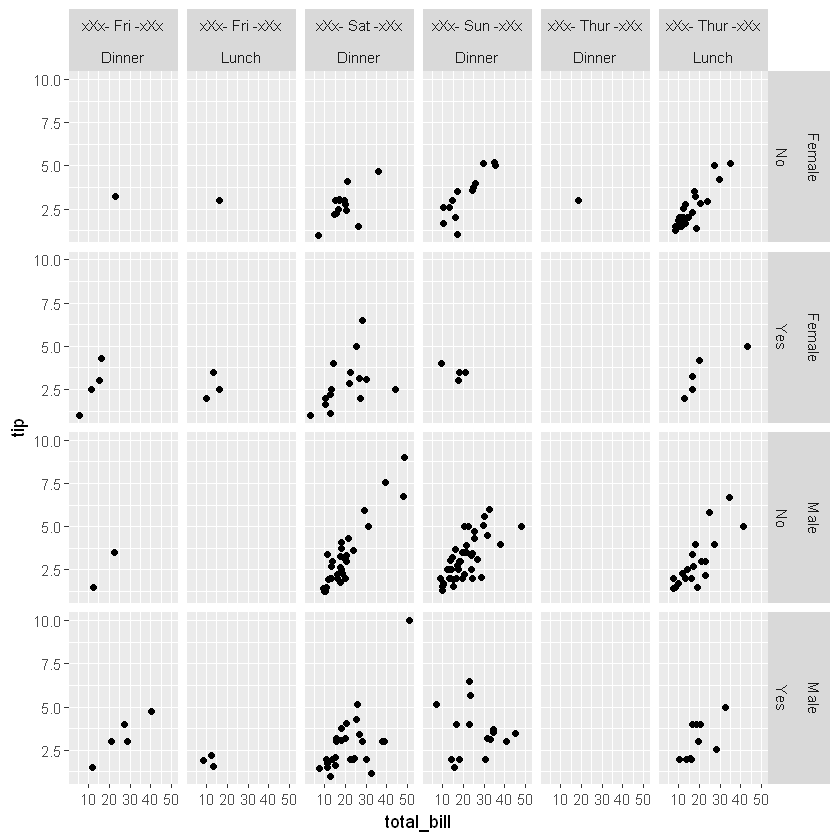

In [15]:
#You can also use it for a few variable of facet instead of all variable
ggplot(tips, aes(total_bill, tip)) + 
geom_point() + 
facet_grid(sex + smoker ~ day + time, labeller = labeller(day = label_decorate))